In [11]:
;cat lin_interp.jl

module MyLinInterp

  export LinearInterpolation

  immutable LinearInterpolation 
    grid::Array
    vals::Array
　end

　function Base.call(a::LinearInterpolation, x::Real)
    i = searchsortedlast(a.grid, x)
    if i == 0 || i == length(a.grid)
        return 0
 　　end
    interpolated_value = (a.vals[i+1]-a.vals[i])/(a.grid[i+1]-a.grid[i])*(x-a.grid[i])+a.vals[i]
    return interpolated_value
　　　
　end

　function Base.call{T<:Real}(a::LinearInterpolation, x::AbstractVector{T})
    n = length(x)
    out = Array(Float64, n)

    for i in 1:n
        out[i] = a(x[i])
    end

    return out
　end
　　

end

In [12]:
include("lin_interp.jl")

MyLinInterp

In [13]:
grid = [0, 2, 4, 6, 8, 10]
vals = [1, 4, 5, 8, 9, 11]
ellenlovespola=MyLinInterp.LinearInterpolation(grid,vals)

MyLinInterp.LinearInterpolation([0,2,4,6,8,10],[1,4,5,8,9,11])

In [14]:
ellenlovespola([1,7,9])

3-element Array{Float64,1}:
  2.5
  8.5
 10.0

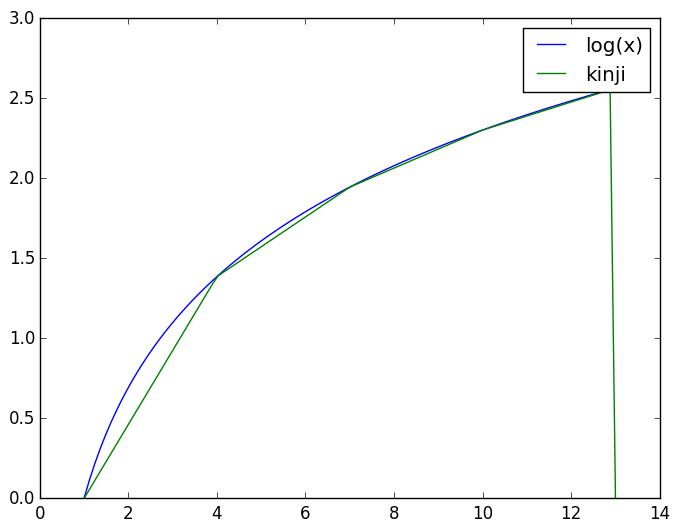

PyObject <matplotlib.legend.Legend object at 0x324f3a6d8>

In [16]:
using PyPlot

f(x)=log(x)
a=1
b=13
grid=linspace(a,b,5)
vals=f(grid)
g=MyLinInterp.LinearInterpolation(grid,vals)
grid2=linspace(a,b,100)
vals2=f(grid2)


plot(grid2,vals2, "b-", label="log(x)")
plot(grid2,g(grid2), "g-", label="kinji")
legend()

In [3]:
Pkg.clone("https://github.com/ellenjunghyunkim/MyInterpolations.jl")

INFO: Cloning MyInterpolations from https://github.com/ellenjunghyunkim/MyInterpolations.jl
INFO: Computing changes...
INFO: No packages to install, update or remove


In [9]:
Pkg.checkout("ellenjunghyunkim/MyInterpolations", "master")

LoadError: LoadError: ellenjunghyunkim/MyInterpolations is not a git repo
while loading In[9], in expression starting on line 1

In [11]:
Pkg.rm("MyInterpolations")

INFO: Removing MyInterpolations (unregistered)


In [12]:
Pkg.clone("https://github.com/ellenjunghyunkim/MyInterpolations.jl")

INFO: Cloning MyInterpolations from https://github.com/ellenjunghyunkim/MyInterpolations.jl
INFO: Computing changes...
INFO: No packages to install, update or remove


In [14]:
using MyInterpolations

LoadError: LoadError: UndefVarError: lin_interp not defined
while loading In[16], in expression starting on line 3